### torchvison
1. models: 提供深度学习中各种经典网络的网络结构以及预训练好的模型，包括                       AlexNet、VGG系列、ResNet系列、Inception系列等。
2. datasets:提供常用的数据集加载，设计上都是继承torhc.utils.data.Dataset，                 主要包括MNIST、CIFAR10/100、ImageNet、COCO等
3. transforms:提供常用的数据预处理操作，主要包括对Tensor以及PIL Image对象的                   操作。

In [4]:
import os
from PIL import Image
import numpy as np
import torch
from torch.utils import data
from torchvision import transforms

transform = transforms.Compose([
                                transforms.Resize(224),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(
                                    [0.5,0.5,0.5],
                                    [0.5,0.5,0.5])
])

In [1]:
from torchvision import models
import torch.nn as nn
#加载预训练好的模型
#存储在～/.torch/models/下面
resnet34 = models.resnet34(pretrained=True, num_classes=1000)
# 修改最后的全连接层为10分类问题（默认是ImageNet上的1000分类）
resnet34.fc = nn.Linear(512, 10)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/yu/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:15<00:00, 5565074.21it/s]


In [5]:
from torchvision import datasets
# 指定数据集路径为data，如果数据集不存在则进行下载
# 通过train=False获取测试集
dataset = datasets.MNIST('data/', download=True, train=False, transform=transform)

Processing...
Done!


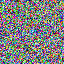

In [6]:
from torch.utils.data import DataLoader
from torchvision import transforms
to_pil = transforms.ToPILImage()
to_pil(torch.randn(3,64,64))

In [7]:
len(dataset)

10000

In [13]:
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset,shuffle=True, batch_size=16)
from torchvision.utils import make_grid, save_image
dataiter = iter(dataloader)
img = make_grid(next(dataiter)[0], 4)
